***
# LDA with POS tagging
***

## Background

Looking at the results of the previous LDA model with the standard stopwords treatment, I have chosen to improve on the LDA model by making use of part-of-speech (POS) tagging to cut down on the less impactful words within a sentence.

POS tagging is the process of marking up a word in a text corpus as corresponding to a particular part of speech. They describe the characteristic structure of lexical terms within a sentence or text, therefore, we can use them for making assumptions about semantics. 

## Analysis

### Import

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [19]:
text_df = pd.read_csv('/Users/lukasiwei/Desktop/dsi25-workspace/Projects/capstone_project/dataset/text_corpus.csv')

In [20]:
text_df

text_column
0                                Nothing is coming out.
1                                      Well, I declare.
2     So today, we are going to be trying out some v...
3     What I've tried. It's probably I think in rece...
4     I do use it. I feel like it does work and it r...
5     What do this viral virus? But would you buy th...
6     When is it when it's gone too far? We even buy...
7                      Mr. We have a little stick here.
8     How do you remove the right time without tryin...
9                        Places where number shaver me.
10    Micro trimmer remove even the finest line is c...
11                        People hiding in the shadows.
12                             Nothing, right. Nothing.
13                           How much is it? Okay. $33.
14    Okay, what is the next product that we have? T...
15    39900, I think it's way more expensive. I thin...
16    Oh my God. Promises deep cleansing of the skin...
17    Oh my God, even spread through the entire face...
18                                        I said, okay.
19    He's already next Friday. So what do we have y...
20          Yes, it is. I'm going to try something new.
21    What is this song? This is a hair straightenin...
22    Okay, so time for fall product. I think this m...
23    I think though that then you pull it back, doe...
24                                  Hey, I did it with.
25           A picture of my God. Oh my God. Oh my God.
26    The way she removed it, right to use multiple ...
27                     I would smile, but it's already.
28    People as, pretty much fun. Tell me, tell me t...
29                                   Plumping collagen.
30    Okay, let's watch a video first. How does this...
31    I think right for the cameras date ideas in th...
32                     Applies it over the Linus world.
33    Something like a bit spicy station and we'll g...
34    How much would think? All right bullet is 1990...
35                                           3 minutes.
36                                      Whitney Wright.
37    Your lips are already very. This is one for yo...
38    All right, so we got all the products right no...
39    Okay, is what this one is the most practical. ...
40    If you like this episode, don't forget to like...
41    How do you say though? It's is there a welcome...
42    We have a special guest on the show. Welcome y...
43    I put question want to make that I don't know....
44    Young and young-at-heart Rodger. The male gues...
45    Kids taking me out of therapy and despise, eve...
46    Very emotional day. Because, you know, it has ...
47    But I'm sure it just made instant noodles. Ver...
48    I come from a traditional South Indian family....
49    Cardi B. You don't just being a self-respectin...
50    Pointing back to what I want? What I feel like...
51    My phone in my love. I love them. And I'm doin...
52    Play Jay gwuapo very open-minded about it in t...
53    My parents understood that it was all a part o...
54    Piccola construct of anybody, any? Any any can...
55    DS1 species is what one humidity, right? We ca...
56    He's freaking emotional that used to it. And h...
57    Like with this kind of mindset and Eve. My bro...
58    Walla Walla. They weren't allowed to be vulner...
59                                       If I say, yes.
60    Obvious from the SS. Okay. I am very emotional...
61    The matter of degree of like, how emotional yo...
62    And I don't think it's because I'm not in touc...
63    This is super insightful into how people how e...
64    I never allowed myself to feel those things. A...
65    That I think they suppress them for so many ye...
66    D&h, and this is one question that don't think...
67    Yeah, Yeah, Yeahs industry, I knew that it is ...
68    I have a friend who is also in in the most eli...
69    Even think about emotions and it feels like, I...
70    But yes, I can do. It said it's going to resur...
71    It's j

In [21]:
# lower and tokenize text_df
def preprocess_text(text):
    """function to lower and tokenize text data """ 
    # lower text
    lower_text = text.lower()

    # tokenize text into a list of words
    tokens = nltk.tokenize.word_tokenize(lower_text)

    return tokens

In [22]:
# final list with tokenized words
tokenized_final = []

# iterate over each string in data
for x in text_df['text_column']:
    token = preprocess_text(x)

    tokenized_final.append(token)

In [23]:
tokenized_final

[['nothing', 'is', 'coming', 'out', '.'],
 ['well', ',', 'i', 'declare', '.'],
 ['so',
  'today',
  ',',
  'we',
  'are',
  'going',
  'to',
  'be',
  'trying',
  'out',
  'some',
  'viral',
  'beauty',
  'products',
  '.',
  'you',
  'look',
  'for',
  'new',
  'things',
  'and',
  'sweat',
  'a',
  'lot',
  'of',
  'other',
  'interesting',
  'native',
  'products',
  'on',
  'the',
  'internet',
  '.',
  'i',
  'may',
  'have',
  'no',
  'use',
  'for',
  'that',
  '.',
  'you',
  'think',
  ',',
  'but',
  'today',
  ',',
  'i',
  'think',
  'that',
  'some',
  'of',
  'the',
  'products',
  'that',
  'we',
  'see',
  'right',
  ',',
  'we',
  'might',
  'not',
  'even',
  'know',
  'what',
  'they',
  'are',
  '.',
  'okay',
  ',',
  'i',
  'guess',
  'what',
  'they',
  'are',
  'and',
  'how',
  'much',
  'they',
  'cost',
  'and',
  'the',
  'winner',
  'will',
  'take',
  'me',
  'home',
  '.'],
 ['what',
  'i',
  "'ve",
  'tried',
  '.',
  'it',
  "'s",
  'probably',
  'i',
 

In [24]:
# convert a list of lists to list
flattened_tokeninized_final = [i for j in tokenized_final for i in j]

In [25]:
# check
flattened_tokeninized_final

['nothing',
 'is',
 'coming',
 'out',
 '.',
 'well',
 ',',
 'i',
 'declare',
 '.',
 'so',
 'today',
 ',',
 'we',
 'are',
 'going',
 'to',
 'be',
 'trying',
 'out',
 'some',
 'viral',
 'beauty',
 'products',
 '.',
 'you',
 'look',
 'for',
 'new',
 'things',
 'and',
 'sweat',
 'a',
 'lot',
 'of',
 'other',
 'interesting',
 'native',
 'products',
 'on',
 'the',
 'internet',
 '.',
 'i',
 'may',
 'have',
 'no',
 'use',
 'for',
 'that',
 '.',
 'you',
 'think',
 ',',
 'but',
 'today',
 ',',
 'i',
 'think',
 'that',
 'some',
 'of',
 'the',
 'products',
 'that',
 'we',
 'see',
 'right',
 ',',
 'we',
 'might',
 'not',
 'even',
 'know',
 'what',
 'they',
 'are',
 '.',
 'okay',
 ',',
 'i',
 'guess',
 'what',
 'they',
 'are',
 'and',
 'how',
 'much',
 'they',
 'cost',
 'and',
 'the',
 'winner',
 'will',
 'take',
 'me',
 'home',
 '.',
 'what',
 'i',
 "'ve",
 'tried',
 '.',
 'it',
 "'s",
 'probably',
 'i',
 'think',
 'in',
 'recent',
 'years',
 'the',
 'facial',
 'roller',
 'and',
 'lock',
 'washer',

In [26]:
# initiate pos tagging
postag_tokens = nltk.pos_tag(flattened_tokeninized_final)

In [27]:
postag_tokens

[('nothing', 'NN'),
 ('is', 'VBZ'),
 ('coming', 'VBG'),
 ('out', 'RP'),
 ('.', '.'),
 ('well', 'RB'),
 (',', ','),
 ('i', 'JJ'),
 ('declare', 'NN'),
 ('.', '.'),
 ('so', 'RB'),
 ('today', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('trying', 'VBG'),
 ('out', 'RP'),
 ('some', 'DT'),
 ('viral', 'JJ'),
 ('beauty', 'NN'),
 ('products', 'NNS'),
 ('.', '.'),
 ('you', 'PRP'),
 ('look', 'VBP'),
 ('for', 'IN'),
 ('new', 'JJ'),
 ('things', 'NNS'),
 ('and', 'CC'),
 ('sweat', 'VB'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('other', 'JJ'),
 ('interesting', 'JJ'),
 ('native', 'JJ'),
 ('products', 'NNS'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('internet', 'NN'),
 ('.', '.'),
 ('i', 'NN'),
 ('may', 'MD'),
 ('have', 'VB'),
 ('no', 'DT'),
 ('use', 'NN'),
 ('for', 'IN'),
 ('that', 'DT'),
 ('.', '.'),
 ('you', 'PRP'),
 ('think', 'VBP'),
 (',', ','),
 ('but', 'CC'),
 ('today', 'NN'),
 (',', ','),
 ('i', 'NN'),
 ('think', 'VBP'),
 ('that', 'IN'),
 

In [28]:
# convert list of tuples into dictionary
def convert(tup, di):
    for a, b in tup:
        di.setdefault(b, []).append(a)
    return di
      
dictionary = {}
convert(postag_tokens, dictionary)

{'NN': ['nothing',
  'declare',
  'today',
  'beauty',
  'lot',
  'internet',
  'i',
  'use',
  'today',
  'i',
  'winner',
  'home',
  'roller',
  'lock',
  'washer',
  'work',
  'right',
  'muscara',
  'okay',
  'lot',
  'beautiful',
  'i',
  'something',
  'bit',
  'track',
  'something',
  'internet',
  'virus',
  'goodness',
  'buffalo',
  'opinion',
  'mr.',
  'stick',
  'time',
  'idealist',
  'number',
  'line',
  'nothing',
  'right',
  'nothing',
  'okay',
  'product',
  'deal-breaker',
  'skin',
  'dick',
  'self',
  'i',
  'way',
  'i',
  'doodle',
  'god',
  'cleansing',
  'skin',
  'vacuum',
  'difference',
  'rock',
  'lady',
  'god',
  'face',
  'i',
  'okay',
  'friday',
  'chest',
  'hair',
  'comb',
  'hair',
  'something',
  'song',
  'hair',
  'brush',
  'iron',
  'price',
  'okay',
  'time',
  'fall',
  'product',
  'hollywood',
  'tape',
  'face',
  'look',
  'hey',
  'i',
  'picture',
  'god',
  'god',
  'god',
  'way',
  'product',
  'list',
  'skin',
  'price'

In [29]:
print(dictionary)

{'NN': ['nothing', 'declare', 'today', 'beauty', 'lot', 'internet', 'i', 'use', 'today', 'i', 'winner', 'home', 'roller', 'lock', 'washer', 'work', 'right', 'muscara', 'okay', 'lot', 'beautiful', 'i', 'something', 'bit', 'track', 'something', 'internet', 'virus', 'goodness', 'buffalo', 'opinion', 'mr.', 'stick', 'time', 'idealist', 'number', 'line', 'nothing', 'right', 'nothing', 'okay', 'product', 'deal-breaker', 'skin', 'dick', 'self', 'i', 'way', 'i', 'doodle', 'god', 'cleansing', 'skin', 'vacuum', 'difference', 'rock', 'lady', 'god', 'face', 'i', 'okay', 'friday', 'chest', 'hair', 'comb', 'hair', 'something', 'song', 'hair', 'brush', 'iron', 'price', 'okay', 'time', 'fall', 'product', 'hollywood', 'tape', 'face', 'look', 'hey', 'i', 'picture', 'god', 'god', 'god', 'way', 'product', 'list', 'skin', 'price', 'ok', 'google', 'i', 'fun', 'collagen', 'okay', 'video', 'work', 'date', 'middle', 'world', 'something', 'bit', 'station', 'couple', 'bullet', 'tik', 'tok', 'okay', 'satisfaction

In [30]:
dictionary_length = len(dictionary)
print(f'There are a total of {dictionary_length} unique dictionary keys.')

There are a total of 38 unique dictionary keys.


In [31]:
# show all keys
dictionary.keys()

dict_keys(['NN', 'VBZ', 'VBG', 'RP', '.', 'RB', ',', 'JJ', 'PRP', 'VBP', 'TO', 'VB', 'DT', 'NNS', 'IN', 'CC', 'MD', 'WP', 'WRB', 'VBN', 'RBR', 'CD', 'PRP$', 'JJS', "''", '$', 'UH', 'VBD', 'JJR', 'POS', 'WDT', 'PDT', 'RBS', 'EX', 'FW', 'NNP', ':', 'WP$'])

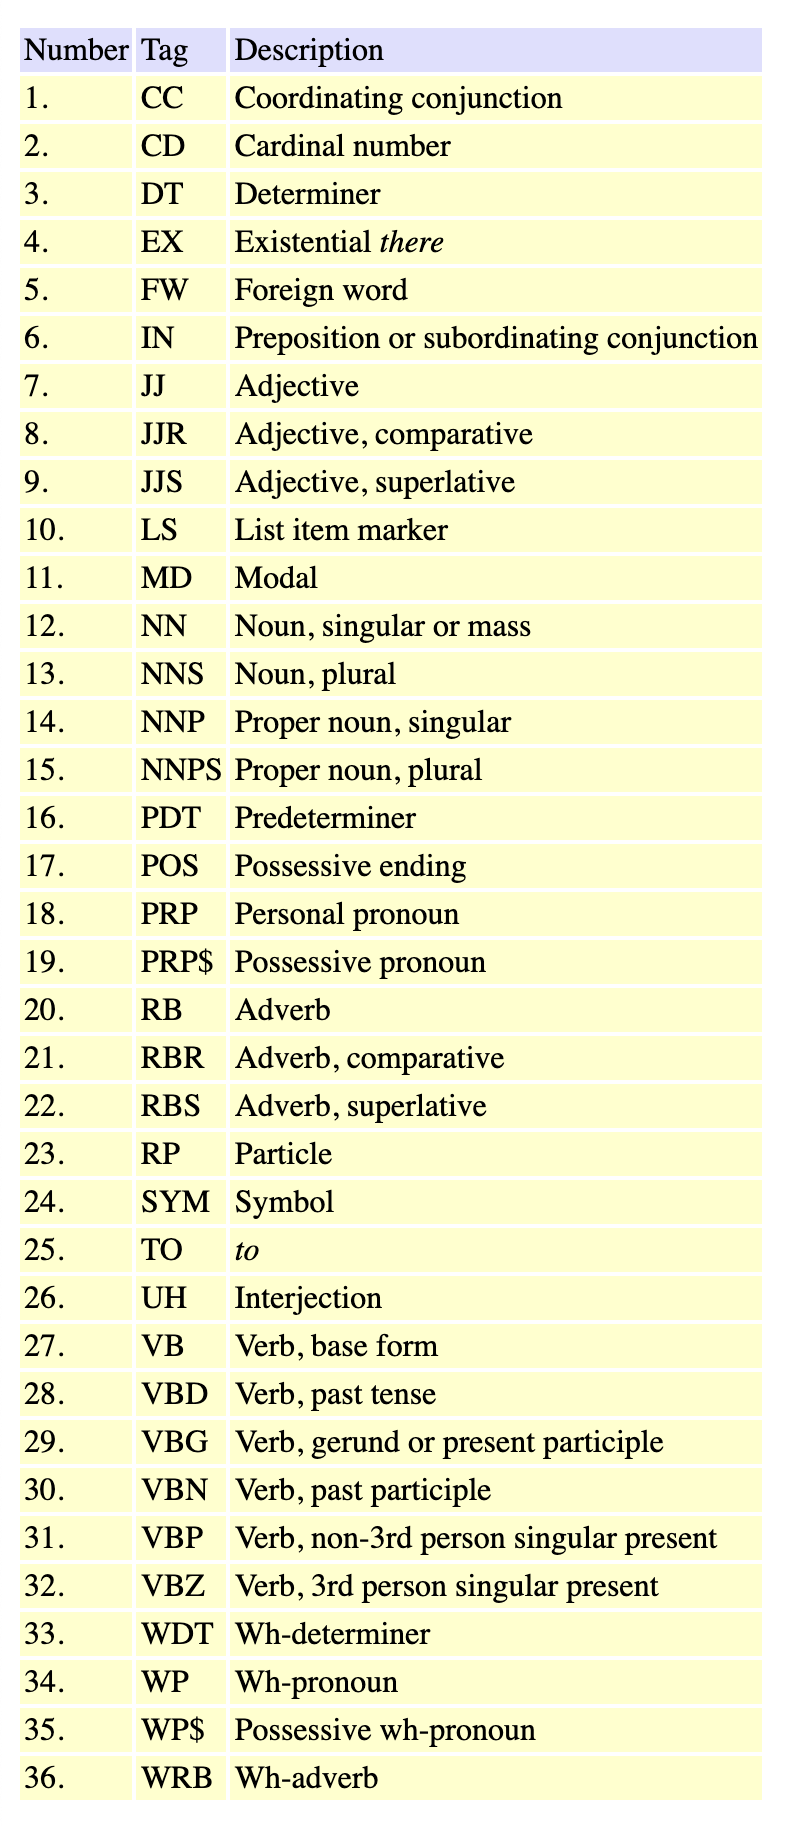

In [32]:
from IPython.display import Image
# obtained from https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
Image(filename='../media/part-of-speech_tags.png', width=300, height=600) 

In [33]:
print(f'Number of tokens')
print(f"NN (Noun, singular or mass): {len(dictionary['NN'])}")
print(f"VBZ (Verb, 3rd person singular present): {len(dictionary['VBZ'])}")
print(f"VBG (Verb, gerund or present participle): {len(dictionary['VBG'])}")
print(f"RP (Particle): {len(dictionary['RP'])}")
print(f"RB (Adverb): {len(dictionary['RB'])}")
print(f"JJ (Adjective): {len(dictionary['JJ'])}")
print(f"PRP (Personal pronoun): {len(dictionary['PRP'])}")
print(f"VBP (Verb, non-3rd person singular present): {len(dictionary['VBP'])}")
print(f"TO (to): {len(dictionary['TO'])}")
print(f"VB (Verb, base form): {len(dictionary['VB'])}")
print(f"DT (Determiner): {len(dictionary['DT'])}")
print(f"NNS (Noun, plural): {len(dictionary['NNS'])}")
print(f"IN (Preposition/subordinating conjunction): {len(dictionary['IN'])}")
print(f"CC (Coordinating conjunction): {len(dictionary['CC'])}")
print(f"MD (Modal): {len(dictionary['MD'])}")
print(f"WP (Wh-pronoun): {len(dictionary['WP'])}")
print(f"WRB (Wh-adverb): {len(dictionary['WRB'])}")
print(f"VBN (Verb, past participle): {len(dictionary['VBN'])}")
print(f"RBR (Adverb, comparative): {len(dictionary['RBR'])}")
print(f"PRP$ (Possessive pronoun): {len(dictionary['PRP$'])}")
print(f"JJS (Adjective, superlative): {len(dictionary['JJS'])}")
print(f"UH (Interjection): {len(dictionary['UH'])}")
print(f"VBD (Verb, past tense): {len(dictionary['VBD'])}")
print(f"JJR (Adjective, comparative): {len(dictionary['JJR'])}")
print(f"POS (Possessive ending): {len(dictionary['POS'])}")
print(f"WDT (Wh-determiner): {len(dictionary['WDT'])}")
print(f"PDT (Predeterminer): {len(dictionary['PDT'])}")
print(f"RBS (Adverb, superlative): {len(dictionary['RBS'])}")
print(f"EX (Existential there): {len(dictionary['EX'])}")
print(f"FW (Foreign word): {len(dictionary['FW'])}")
print(f"NNP (Proper noun, singular): {len(dictionary['NNP'])}")
print(f"WP$ (Possessive wh-pronoun): {len(dictionary['WP$'])}")

Number of tokens
NN (Noun, singular or mass): 44298
VBZ (Verb, 3rd person singular present): 10796
VBG (Verb, gerund or present participle): 6558
RP (Particle): 1677
RB (Adverb): 26082
JJ (Adjective): 21895
PRP (Personal pronoun): 28746
VBP (Verb, non-3rd person singular present): 20191
TO (to): 9495
VB (Verb, base form): 20818
DT (Determiner): 24529
NNS (Noun, plural): 11213
IN (Preposition/subordinating conjunction): 37840
CC (Coordinating conjunction): 12625
MD (Modal): 5134
WP (Wh-pronoun): 2748
WRB (Wh-adverb): 3585
VBN (Verb, past participle): 3793
RBR (Adverb, comparative): 550
PRP$ (Possessive pronoun): 5744
JJS (Adjective, superlative): 438
UH (Interjection): 981
VBD (Verb, past tense): 8429
JJR (Adjective, comparative): 996
POS (Possessive ending): 631
WDT (Wh-determiner): 1630
PDT (Predeterminer): 458
RBS (Adverb, superlative): 137
EX (Existential there): 508
FW (Foreign word): 63
NNP (Proper noun, singular): 16
WP$ (Possessive wh-pronoun): 2


The complete list of items of each POS tag can be viewed in Appendix B: POS tagging content. 

For topic modelling, we are mainly interested in the NN, VBG, JJ, VB, NNS, VBN lists. Hence we will create a new subset of the text corpus consisting of the above lists and preprocess them further.

# Further text preprocessing

In [34]:
# define keys that we want
subset_keys = ['NN', 'VBG', 'JJ', 'VB', 'NNS', 'VBN']

In [35]:
# iterate through the corpus to get only the keys we want
text_subset = [dictionary[x] for x in subset_keys]

In [36]:
text_subset

[['nothing',
  'declare',
  'today',
  'beauty',
  'lot',
  'internet',
  'i',
  'use',
  'today',
  'i',
  'winner',
  'home',
  'roller',
  'lock',
  'washer',
  'work',
  'right',
  'muscara',
  'okay',
  'lot',
  'beautiful',
  'i',
  'something',
  'bit',
  'track',
  'something',
  'internet',
  'virus',
  'goodness',
  'buffalo',
  'opinion',
  'mr.',
  'stick',
  'time',
  'idealist',
  'number',
  'line',
  'nothing',
  'right',
  'nothing',
  'okay',
  'product',
  'deal-breaker',
  'skin',
  'dick',
  'self',
  'i',
  'way',
  'i',
  'doodle',
  'god',
  'cleansing',
  'skin',
  'vacuum',
  'difference',
  'rock',
  'lady',
  'god',
  'face',
  'i',
  'okay',
  'friday',
  'chest',
  'hair',
  'comb',
  'hair',
  'something',
  'song',
  'hair',
  'brush',
  'iron',
  'price',
  'okay',
  'time',
  'fall',
  'product',
  'hollywood',
  'tape',
  'face',
  'look',
  'hey',
  'i',
  'picture',
  'god',
  'god',
  'god',
  'way',
  'product',
  'list',
  'skin',
  'price',
  'o

In [37]:
# unpack nested list into list
new_corpus = [i for new_text in text_subset for i in new_text]

In [38]:
# convert list to string
def listtostring(new_corpus): 
    """function for converting a list to a string"""    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(new_corpus))

subset_corpus = listtostring(new_corpus)

In [39]:
# iterate through the string to remove stopwords
tokens_without_sw = [word for word in new_corpus if not word in stopwords.words()]

In [40]:
# remove additional stopwords
additional_sw = ['bit', 'right', 'cuz', 'yeah', 'episode', 'okay', 'see', 'make', 'say', 'put', 'like', 
                 'know', 'thing', 'let', 'get', 'need']
tokens_without_sw = [word for word in tokens_without_sw if not word in additional_sw]

In [41]:
# check
tokens_without_sw

['nothing',
 'declare',
 'today',
 'beauty',
 'lot',
 'internet',
 'use',
 'today',
 'winner',
 'home',
 'roller',
 'lock',
 'washer',
 'work',
 'muscara',
 'lot',
 'beautiful',
 'something',
 'track',
 'something',
 'internet',
 'virus',
 'goodness',
 'buffalo',
 'opinion',
 'mr.',
 'stick',
 'time',
 'idealist',
 'number',
 'line',
 'nothing',
 'nothing',
 'product',
 'deal-breaker',
 'skin',
 'dick',
 'self',
 'way',
 'doodle',
 'god',
 'cleansing',
 'skin',
 'vacuum',
 'difference',
 'rock',
 'lady',
 'god',
 'friday',
 'chest',
 'hair',
 'comb',
 'hair',
 'something',
 'song',
 'hair',
 'brush',
 'iron',
 'price',
 'time',
 'fall',
 'product',
 'hollywood',
 'tape',
 'look',
 'hey',
 'picture',
 'god',
 'god',
 'god',
 'way',
 'product',
 'list',
 'skin',
 'price',
 'ok',
 'google',
 'fun',
 'collagen',
 'video',
 'work',
 'date',
 'middle',
 'world',
 'something',
 'station',
 'couple',
 'bullet',
 'tik',
 'tok',
 'satisfaction',
 'whitney',
 'wright',
 'table',
 'comment',
 'sec

In [42]:
def regex(text):
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub('http\S+', '', text)
    text = re.sub(r'\&\w*;', '', text)
    text = re.sub('xa0', '', str(text)).strip()
    text = re.sub('x200b', '', str(text)).strip()
        
    # Make texts lowercase
    text = text.lower()
    
    # Remove url
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
        
    # Remove punctuation
    text = re.sub(r'[^\w\d\s]+', '', text)
        
    # Remove texts with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove special characters
    text = ''.join(c for c in text if c <= '\uFFFF') 
    
    return text

In [43]:
# apply regex function
regex_tokens = [regex(x) for x in tokens_without_sw]

In [44]:
# apply lemmatizer
lemmatizer = WordNetLemmatizer()
lemma_tokens = [lemmatizer.lemmatize(x) for x in regex_tokens]

In [45]:
lemma_tokens

['nothing',
 'declare',
 'today',
 'beauty',
 'lot',
 'internet',
 'use',
 'today',
 'winner',
 'home',
 'roller',
 'lock',
 'washer',
 'work',
 'muscara',
 'lot',
 'beautiful',
 'something',
 'track',
 'something',
 'internet',
 'virus',
 'goodness',
 'buffalo',
 'opinion',
 '',
 'stick',
 'time',
 'idealist',
 'number',
 'line',
 'nothing',
 'nothing',
 'product',
 'dealbreaker',
 'skin',
 'dick',
 'self',
 'way',
 'doodle',
 'god',
 'cleansing',
 'skin',
 'vacuum',
 'difference',
 'rock',
 'lady',
 'god',
 'friday',
 'chest',
 'hair',
 'comb',
 'hair',
 'something',
 'song',
 'hair',
 'brush',
 'iron',
 'price',
 'time',
 'fall',
 'product',
 'hollywood',
 'tape',
 'look',
 'hey',
 'picture',
 'god',
 'god',
 'god',
 'way',
 'product',
 'list',
 'skin',
 'price',
 '',
 'google',
 'fun',
 'collagen',
 'video',
 'work',
 'date',
 'middle',
 'world',
 'something',
 'station',
 'couple',
 'bullet',
 'tik',
 'tok',
 'satisfaction',
 'whitney',
 'wright',
 'table',
 'comment',
 'section',

In [46]:
# remove empty lists
clean_tokens = [i for i in lemma_tokens if i]

In [47]:
# define function as list of lists required for TF-IDF

def listoflist(clean_tokens):
    """function to convert list into list of lists"""
    return [[i] for i in clean_tokens]
                  
clean_text = (listoflist(clean_tokens))

## Baseline Model

In [48]:
# for the base model, the model parameters and hyperparameters are set to their default values

# create Dictionary
id2word = corpora.Dictionary(clean_text)

# create Corpus
texts = clean_text

# term-document frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1)]


In [49]:
# define number of topics
#num_topics = 8

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.156*"look" + 0.089*"work" + 0.080*"love" + 0.038*"baby" + '
  '0.021*"community" + 0.020*"home" + 0.017*"sort" + 0.015*"business" + '
  '0.012*"number" + 0.007*"label"'),
 (1,
  '0.146*"month" + 0.103*"show" + 0.052*"going" + 0.044*"place" + '
  '0.034*"opinion" + 0.019*"dream" + 0.011*"google" + 0.010*"beautiful" + '
  '0.007*"count" + 0.006*"dad"'),
 (2,
  '0.142*"issue" + 0.114*"question" + 0.109*"relationship" + '
  '0.090*"conversation" + 0.071*"emotion" + 0.040*"member" + 0.018*"piece" + '
  '0.014*"level" + 0.013*"value" + 0.011*"interesting"'),
 (3,
  '0.342*"friend" + 0.069*"way" + 0.059*"mean" + 0.048*"help" + 0.041*"stuck" '
  '+ 0.033*"partner" + 0.028*"hand" + 0.022*"mother" + 0.021*"choice" + '
  '0.019*"situation"'),
 (4,
  '0.404*"people" + 0.300*"thing" + 0.058*"think" + 0.044*"feel" + 0.040*"day" '
  '+ 0.012*"family" + 0.012*"problem" + 0.010*"part" + 0.009*"decision" + '
  '0.004*"side"'),
 (5,
  '0.263*"parent" + 0.171*"kid" + 0.044*"good" + 0.035*"differ

### Baseline coherence scores

In [35]:
# Compute Perplexity
# a measure of how good the model is: lower the better.
print('\nPerplexity Score: ', lda_model.log_perplexity(corpus))  

# Compute Coherence Score
# Higher the topic coherence, the topic is more human interpretable.
coherence_model_lda = CoherenceModel(model = lda_model, texts = clean_text, dictionary = id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity Score:  -18.675260942117024

Coherence Score:  0.8205762346871364


### Hyperparameter Tuning

- Number of Topics (k)
- Dirichlet hyperparameter alpha: Document-Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

In [36]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_text, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [37]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
                    
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████| 540/540 [5:50:03<00:00, 38.90s/it]  


Image(filename='../media/part-of-speech_tags.png', width=300, height=600) 

# Final Model

In [38]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

In [1]:
from IPython.display import IFrame
IFrame(src='../media/lda.html', width=1000, height=800)

## Analysis Insights

The analysis results are closer to what the EDA results shown previously but some of the topic clusters still rely very much on guess work. In addition to the previous list of topics consisting of: health, harassment, relationships, passage of time, identity, gratefulness and career:

- Topic 0: entrepreneurship
- Topic 4: conflict resolution
- Topic 6: visibility/voicing out
- Topic 9: family planning